Here's data about 83000 board games which has been collected by Sean Beak with their associated review scores. I'd try to predict average rating of the games from the other features and find patterns as much as possible.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [36]:
board_games = pd.read_csv("board_games.csv")

In [37]:
print board_games.head(10)

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   
5   31260  boardgame                                   Agricola   
6  124742  boardgame                         Android: Netrunner   
7   96848  boardgame                     Mage Knight Board Game   
8   84876  boardgame                    The Castles of Burgundy   
9   72125  boardgame                                    Eclipse   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.

In [38]:
# Check the column names
print board_games.columns

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')


In [39]:
# Data types of columns

print board_games.dtypes

id                        int64
type                     object
name                     object
yearpublished           float64
minplayers              float64
maxplayers              float64
playingtime             float64
minplaytime             float64
maxplaytime             float64
minage                  float64
users_rated               int64
average_rating          float64
bayes_average_rating    float64
total_owners              int64
total_traders             int64
total_wanters             int64
total_wishers             int64
total_comments            int64
total_weights             int64
average_weight          float64
dtype: object


In [40]:
#Is there any missing values?
board_games.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [41]:
# Drop all missing values
board_games = board_games.dropna(axis = 0)

In [42]:
board_games.isnull().sum()


id                      0
type                    0
name                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

In [44]:
# See if there's any games with no reviewers
has_reviewers = board_games["users_rated"]!=0
print sum(has_reviewers)
print board_games.shape

56894
(81268, 20)


In [45]:
# Pick only the rows that has any reviewers
board_games = board_games[has_reviewers]

In [46]:
board_games.shape

(56894, 20)

In [57]:
board_games["playingtime"].describe()

count    56894.000000
mean        59.921503
std        406.451917
min          0.000000
25%         15.000000
50%         30.000000
75%         60.000000
max      60120.000000
Name: playingtime, dtype: float64

In [64]:
#which game has the highest playing time?

print board_games.loc[board_games["playingtime"].idxmax()]

# it's kind of funny that only one person played the game with the highest playing time.

Hammer's Slammers: The Crucible
id                                               164363
type                                          boardgame
name                    Hammer's Slammers: The Crucible
yearpublished                                      2010
minplayers                                            2
maxplayers                                            4
playingtime                                       60120
minplaytime                                       60120
maxplaytime                                       60120
minage                                               14
users_rated                                           1
average_rating                                      7.5
bayes_average_rating                                  0
total_owners                                          4
total_traders                                         0
total_wanters                                         0
total_wishers                                         0
total_comments  

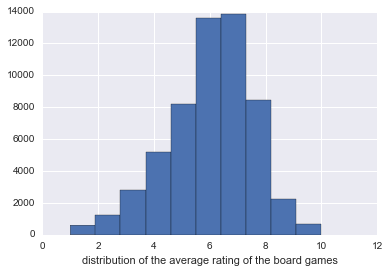

In [75]:
plt.hist(board_games["average_rating"])
plt.xlabel("distribution of the average rating of the board games")

In [71]:
board_games["average_rating"].describe()

count    56894.000000
mean         6.016113
std          1.578830
min          1.000000
25%          5.000000
50%          6.150000
75%          7.040000
max         10.000000
Name: average_rating, dtype: float64

In [78]:
# Which games had rating above 8? Might be a good place to find recommendations



board_games[board_games["average_rating"]>8]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,31260,boardgame,Agricola,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,124742,boardgame,Android: Netrunner,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,96848,boardgame,Mage Knight Board Game,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,84876,boardgame,The Castles of Burgundy,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


In [79]:
board_games[board_games["average_rating"]>8].describe()


,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000
mean,121874.297878,1891.001378,1.856985,5.312207,91.523560,82.364012,91.523560,8.799118,215.625517,8.725613,1.258866,442.771287,6.399284,28.519978,102.439791,55.413337,22.350510,1.646295
std,53389.028608,471.632623,0.866308,10.571452,355.548671,332.219871,355.548671,5.558910,1741.435552,0.602968,2.520611,2296.353893,39.377447,109.961600,482.694273,400.336082,204.449893,1.568744
min,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88471.000000,2008.000000,2.000000,2.000000,20.000000,20.000000,20.000000,6.000000,1.000000,8.249150,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,140341.000000,2012.000000,2.000000,4.000000,45.000000,45.000000,45.000000,10.000000,4.000000,8.500000,0.000000,15.000000,0.000000,2.000000,5.000000,3.000000,1.000000,2.000000
75%,165542.000000,2014.000000,2.000000,6.000000,90.000000,90.000000,90.000000,12.000000,19.000000,9.000000,0.000000,90.000000,2.000000,12.000000,29.000000,11.000000,3.000000,3.000000
max,184002.000000,2016.000000,15.000000,125.000000,14400.000000,14400.000000,14400.000000,99.000000,39883.000000,10.000000,8.221860,47522.000000,837.000000,1586.000000,6402.000000,9310.000000,5213.000000,5.000000


In [82]:
# How many types of board games are here? 

print board_games["type"].value_counts()


boardgame             48039
boardgameexpansion     8855
Name: type, dtype: int64


In [89]:
# What's the distribution of the player counts?

board_games["maxplayers"].value_counts().sort_index()

# Note : There's no way 3173 games have a max player count of 0.0. Very very weird!

0.0         3173
1.0          691
2.0        12909
3.0          764
4.0        15846
5.0         5204
6.0        11103
7.0          709
8.0         3126
9.0          179
10.0        1157
11.0          21
12.0         675
13.0          20
14.0          32
15.0          89
16.0         219
17.0           9
18.0          48
19.0           3
20.0         212
21.0           9
22.0          14
24.0          84
25.0          21
26.0           2
27.0           2
28.0           7
29.0           1
30.0          63
           ...  
60.0           6
61.0           2
64.0           1
68.0           6
75.0           6
76.0           1
80.0           1
90.0           1
92.0           1
98.0           1
99.0         294
100.0         28
101.0          2
102.0          4
103.0          1
104.0          1
112.0          1
120.0          1
125.0          1
200.0          4
362.0          1
399.0          1
400.0          1
500.0          2
600.0          1
999.0          5
1000.0         1
2000.0        

## Error metric :
I want to try MSE/RMSE as an error metric for now in linear regression since the data is continuous and penalizing larger errors might be a good idea.

In [93]:
# Drop all non-numeric columns 

numeric = board_games.iloc[:,3:]
game_mean = numeric.apply(np.mean,axis=1)
game_std = numeric.apply(np.std, axis =1)

In [95]:
print numeric.shape
print board_games.shape

(56894, 17)
(56894, 20)


In [96]:
print numeric.columns

Index([u'yearpublished', u'minplayers', u'maxplayers', u'playingtime',
       u'minplaytime', u'maxplaytime', u'minage', u'users_rated',
       u'average_rating', u'bayes_average_rating', u'total_owners',
       u'total_traders', u'total_wanters', u'total_wishers', u'total_comments',
       u'total_weights', u'average_weight'],
      dtype='object')


In [98]:
# practicing clustering based on higher values and variance of features vs lower values and variance of features here.

from sklearn.cluster import KMeans

Cluster = KMeans(n_clusters = 5)
Cluster.fit(numeric)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [101]:
# Find the labels of the cluster
labels = Cluster.labels_


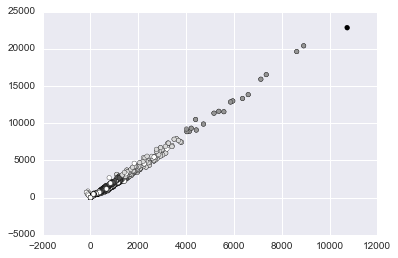

In [102]:
plt.scatter(x=game_mean,y=game_std,c=labels)

Looks like most games tend to cluster together, but as the feature values tend to increase there are fewer games. Most games don't get played much though as many games has mean and std at zero which indicates nearly zero activity while some games have very high feature values (e.g number of people commented, long playing time, multiplayer games etc)

In [103]:
# let's check the correlations 

correlations = numeric.corr()

In [106]:
correlations

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
yearpublished,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081
bayes_average_rating,0.140998,0.034915,-0.003437,0.045341,0.041845,0.045341,0.266937,0.317992,0.231563,1.000000,0.371017,0.455021,0.426708,0.377213,0.371031,0.313302,0.482356


In [107]:
print correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


Note : Average rating seems to be highly correlated with yearpublished which indicates recent games tend to get better ratings. It's also highly correlated with average weight, but I'm not exactly sure how does this weight is calculated.Minage seems to be correlated too but in reality board games tend to be 13+ i.e they shoot low to get more owners.

In [114]:
# Let's do the linear regression this time

columns = list(board_games.columns)
print columns
remove_list = ['id','type','name','average_rating','bayes_average_rating']
for x in remove_list:
    columns.remove(x)
print columns

['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']
['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [115]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(board_games[columns],board_games['average_rating'])
predictions = reg.predict(board_games[columns])


In [116]:
mse = np.mean((predictions - board_games['average_rating'])**2)

In [118]:
print mse
print mse**(0.5)

2.09339697583
1.44685762113


This notebook was created without doing the train test split(frankly I probably should read on that first), so we should be suspicious of it's validity. Not to mention , mse is near standard deviation so this does not seem like a good predictive model. Too bad!

# To do:
1.Split the data into training and testing sets, and calculate error on the testing set.
2.Try algorithms other than linear regression.
3.Calculate new predictors based off the the existing columns, such as: Player range (maxplayers - minplayers),Playing time range (maxplaytime - minplaytime),Average number of ratings (total_owners / users_rated)